In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/Kaggle/Housing/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
X = df.drop('price',axis=1)
y = df['price']

In [5]:
y_log = np.log1p(y)


In [6]:
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']
categorical_cols = ['furnishingstatus']


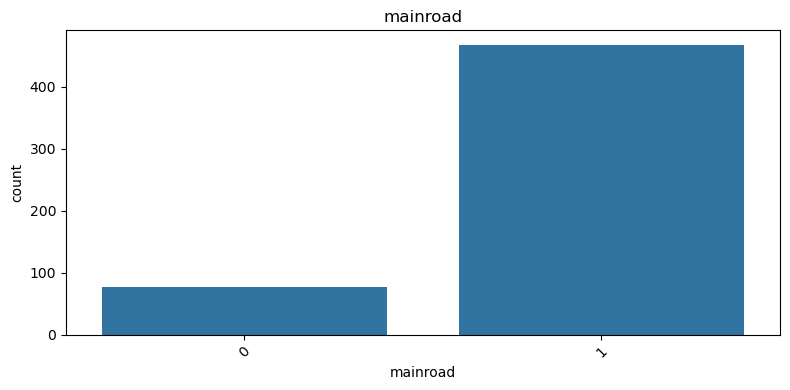

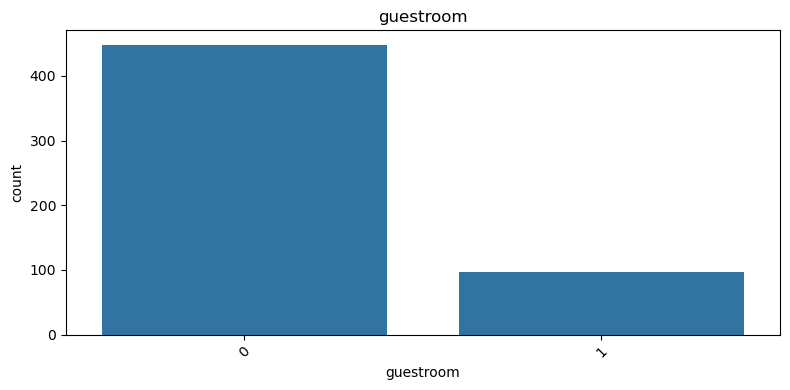

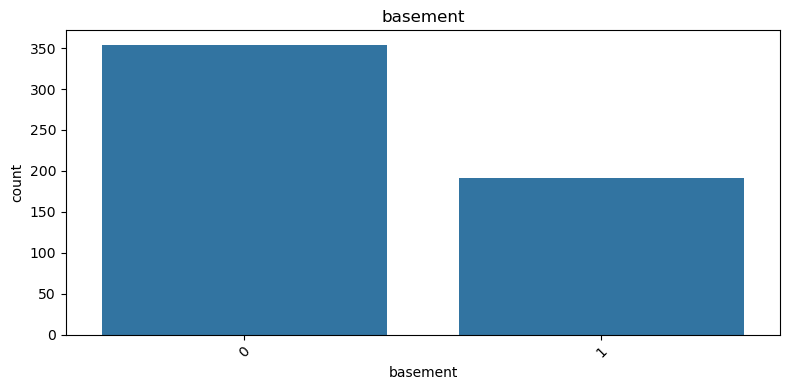

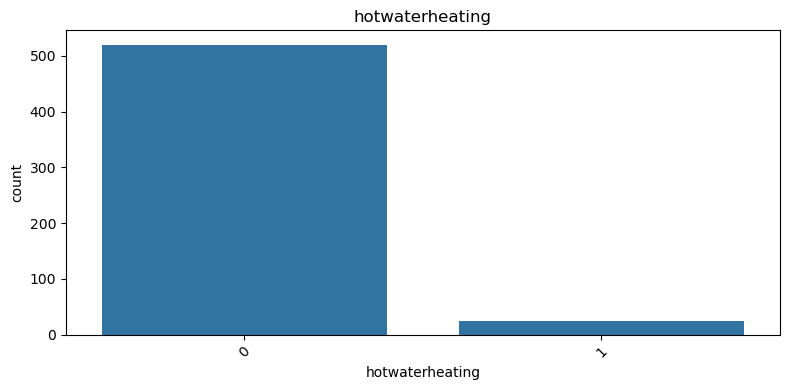

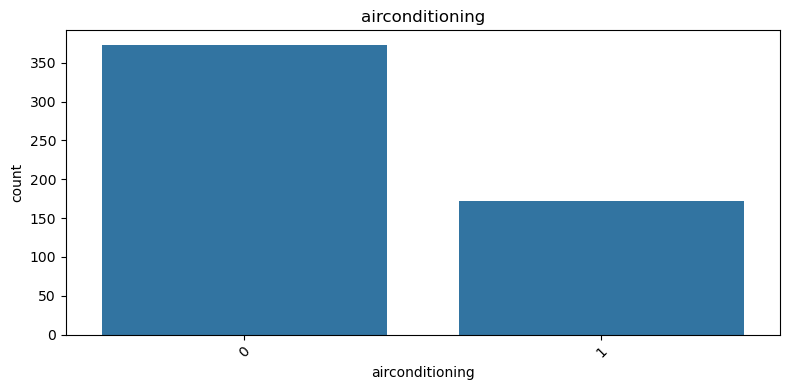

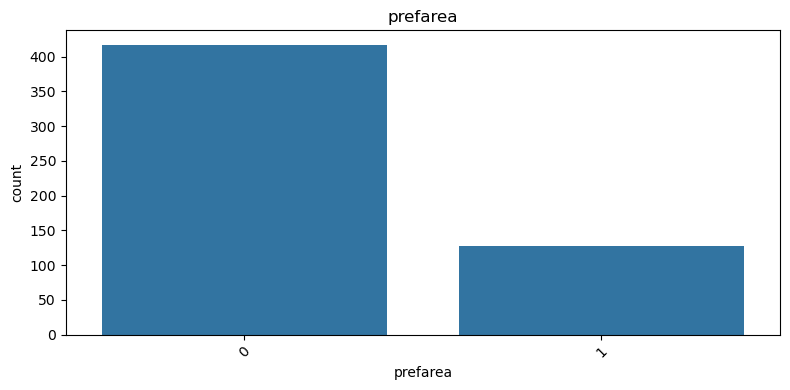

In [18]:
for col in binary_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=X)
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

['bedrooms', 'bathrooms', 'stories', 'parking']


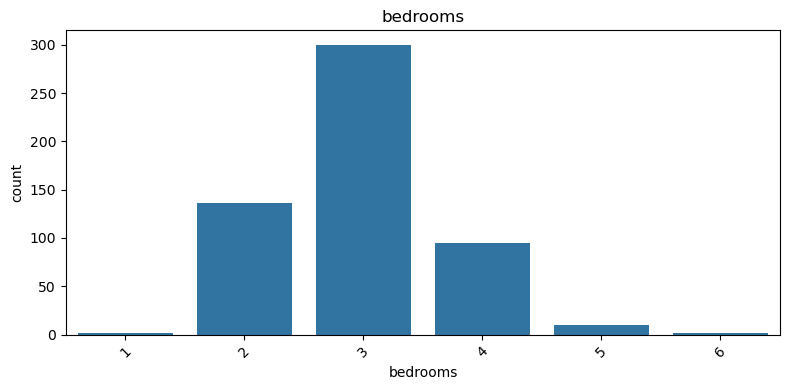

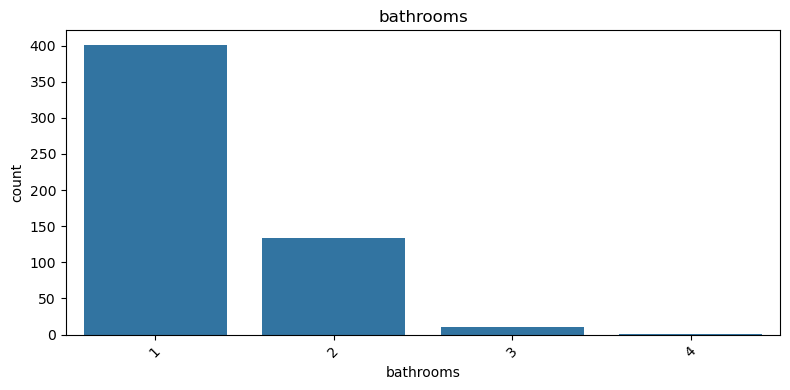

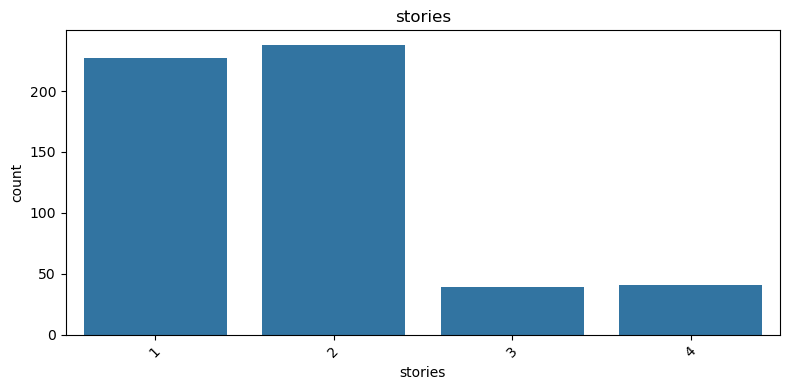

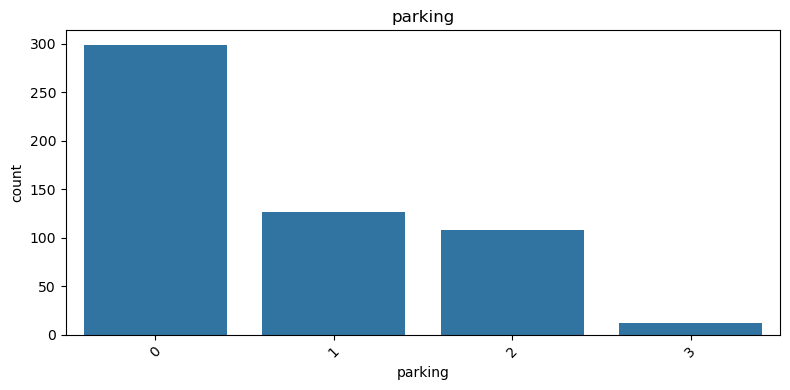

In [26]:
new_col=[]
for i in numeric_cols:
    if i>numeric_cols[0]:
        new_col.append(i)
print(new_col)

for col in new_col:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=df)
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

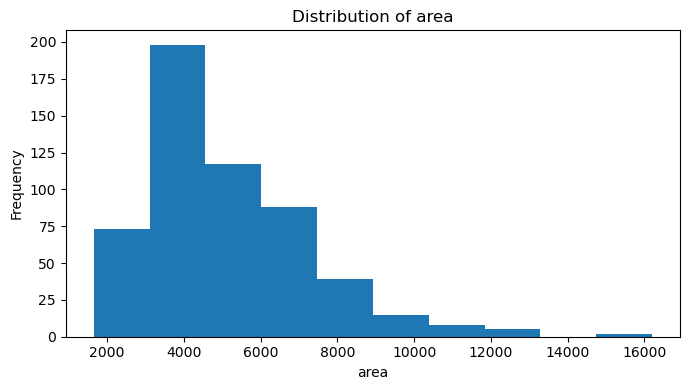

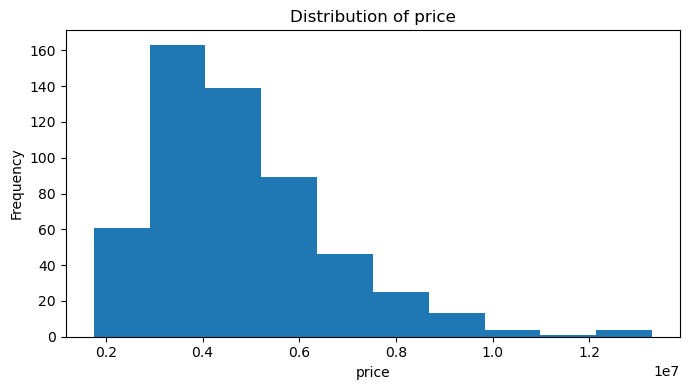

In [31]:
list2 = []
list2.append('area')
list2.append('price')
for col in list2:
    plt.figure(figsize=(7,4))
    plt.hist(df[col],)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

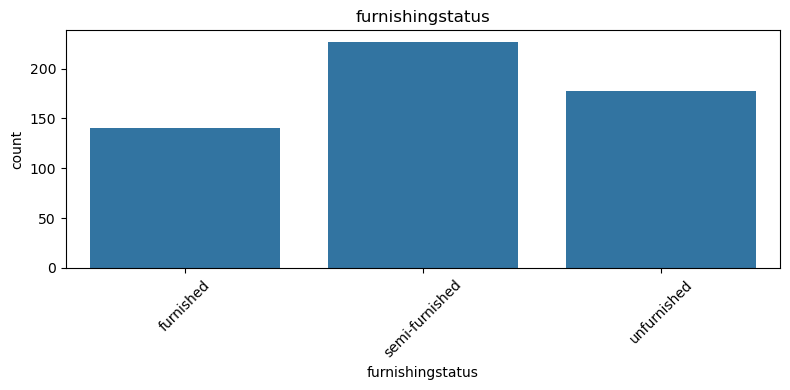

In [32]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=df)
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='drop')


In [8]:
for col in binary_cols:
    X[col] = X[col].map({'yes': 1, 'no': 0})

In [9]:
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)


In [10]:
X_train_trans = preprocess.fit_transform(X_train)
X_test_trans = preprocess.transform(X_test)


In [11]:
X_train_final = np.hstack([X_train_trans, X_train[binary_cols].values])
X_test_final  = np.hstack([X_test_trans,  X_test[binary_cols].values])


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_final, y_train_log)


LinearRegression()

In [13]:
y_pred_log = model.predict(X_test_final)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test_original, y_pred))
print("MSE:", mean_squared_error(y_test_original, y_pred))


MAE: 960123.1734346991
MSE: 1728299877704.5637


In [15]:
from sklearn.metrics import  root_mean_squared_error
print("RMSE:",root_mean_squared_error(y_test_original, y_pred))


RMSE: 1314648.195413725


In [16]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished
